# CV19MUILTISIM: 
Parameter exploration module for cv19gm. 
With this module you can easily perform sensitivity analysis over multiple parameters


In [1]:
from cv19gm.cv19multisim import CV19MULTISIM

In [2]:
import numpy as np
import toml
import time
import matplotlib.pyplot as plt

In [3]:
cfg = '../config_files/SEIR.toml'

## Creación objeto de multisimulación

In [4]:
sims = CV19MULTISIM(cfg,beta=[0.1,0.15,0.2,0.25,0.3])

In [6]:
# Resolver EDOS
sims.solve()

In [7]:
sims.sims[0].results

,t,dates,S,E,E_d,I,I_d,R,R_d,Flux,...,I_d_det,I_ac_det,beta,alpha,tE_I,tI_R,rR_S,prevalence_total,prevalence_susc,prevalence_det
0,0,None,987212,1788,894,5999,3000,5000,0,0,...,3000,15000,0.1,1.0,5.0,10.0,0.0,0.015000,0.015000,0.015000
1,1,None,986630,1990,695,5789,1345,5588,371,0,...,1345,18000,0.1,1.0,5.0,10.0,0.0,0.018000,0.018000,0.018000
2,2,None,986067,2139,610,5632,757,6159,496,0,...,757,19345,0.1,1.0,5.0,10.0,0.0,0.019345,0.019345,0.019345
3,3,None,985518,2249,571,5515,557,6716,534,0,...,557,20103,0.1,1.0,5.0,10.0,0.0,0.020103,0.020103,0.020103
4,4,None,984979,2329,550,5426,495,7263,541,0,...,495,20660,0.1,1.0,5.0,10.0,0.0,0.020661,0.020661,0.020661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,None,882764,130,25,283,26,116821,28,0,...,26,125789,0.1,1.0,5.0,10.0,0.0,0.125790,0.125790,0.125790
496,496,None,882739,129,25,281,26,116849,28,0,...,26,125816,0.1,1.0,5.0,10.0,0.0,0.125816,0.125816,0.125816
497,497,None,882715,128,24,279,25,116877,28,0,...,25,125842,0.1,1.0,5.0,10.0,0.0,0.125842,0.125842,0.125842
498,498,None,882690,127,24,276,25,116905,27,0,...,25,125868,0.1,1.0,5.0,10.0,0.0,0.125868,0.125868,0.125868


# kwargs

In [16]:
sims2 = CV19MULTISIM(cfg,I=[5000,8000,10000],population=[100000,500000,1000000])

In [17]:
start = time.time()
sims2.solve()
stop = time.time()
print('Elapsed time = '+str(stop-start)+' seconds')

Elapsed time = 0.15782594680786133 seconds


In [19]:
sims2.sims[0,1].results

,t,dates,S,E,E_d,I,I_d,R,R_d,Flux,...,I_d_det,I_ac_det,beta,alpha,tE_I,tI_R,rR_S,prevalence_total,prevalence_susc,prevalence_det
0,0,None,488510,1490,894,5000,3000,5000,0,0,...,3000,15000,0.2,1.0,5.0,10.0,0.0,0.030000,0.030000,0.030000
1,1,None,487548,2090,934,4868,1337,5492,310,0,...,1337,18000,0.2,1.0,5.0,10.0,0.0,0.036000,0.036000,0.036000
2,2,None,486603,2568,941,4850,792,5977,420,0,...,792,19337,0.2,1.0,5.0,10.0,0.0,0.038676,0.038676,0.038676
3,3,None,485655,2962,946,4917,645,6465,463,0,...,645,20130,0.2,1.0,5.0,10.0,0.0,0.040261,0.040261,0.040261
4,4,None,484689,3301,959,5046,637,6962,485,0,...,637,20776,0.2,1.0,5.0,10.0,0.0,0.041553,0.041553,0.041553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,None,101034,0,0,0,0,398965,0,0,...,0,408638,0.2,1.0,5.0,10.0,0.0,0.817277,0.817277,0.817277
496,496,None,101034,0,0,0,0,398965,0,0,...,0,408638,0.2,1.0,5.0,10.0,0.0,0.817277,0.817277,0.817277
497,497,None,101034,0,0,0,0,398965,0,0,...,0,408638,0.2,1.0,5.0,10.0,0.0,0.817277,0.817277,0.817277
498,498,None,101034,0,0,0,0,398965,0,0,...,0,408638,0.2,1.0,5.0,10.0,0.0,0.817277,0.817277,0.817277


# Single simulation

In [20]:
cfg = '../config_files/SEIR.toml'

In [21]:
sims3 = CV19MULTISIM(cfg)

In [22]:
sims3.solve()

In [23]:
sim = sims3.sims[0]

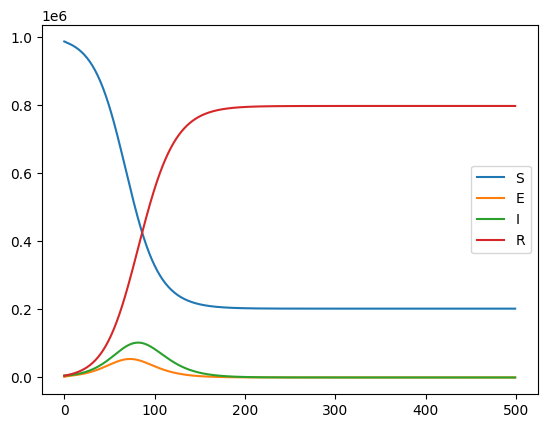

In [24]:
plt.plot(sim.t,sim.S,label='S')
plt.plot(sim.t,sim.E,label='E')
plt.plot(sim.t,sim.I,label='I')
plt.plot(sim.t,sim.R,label='R')
plt.legend(loc=0)
plt.show()

In [25]:
def seno(t):
    return 0.1*np.sin(t) + 0.1

In [26]:
sims3 = CV19MULTISIM(cfg,beta=seno)

In [27]:
sims3.solve()

In [28]:
sims3.sims[0].results

,t,dates,S,E,E_d,I,I_d,R,R_d,Flux,...,I_d_det,I_ac_det,beta,alpha,tE_I,tI_R,rR_S,prevalence_total,prevalence_susc,prevalence_det
0,0,None,987212,1788,893,5999,3000,5000,0,0,...,3000,15000,0.100000,1.0,5.0,10.0,0.0,0.015000,0.015000,0.015000
1,1,None,986364,2239,888,5806,1359,5589,371,0,...,1359,18000,0.184147,1.0,5.0,10.0,0.0,0.018000,0.018000,0.018000
2,2,None,985252,2841,1030,5740,828,6165,500,0,...,828,19359,0.190930,1.0,5.0,10.0,0.0,0.019359,0.019359,0.019359
3,3,None,984361,3127,919,5770,690,6740,547,0,...,690,20187,0.114112,1.0,5.0,10.0,0.0,0.020188,0.020188,0.020188
4,4,None,983983,2894,550,5801,636,7319,567,0,...,636,20877,0.024320,1.0,5.0,10.0,0.0,0.020878,0.020878,0.020878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,None,884892,99,8,236,22,114772,23,0,...,22,123689,0.001977,1.0,5.0,10.0,0.0,0.123690,0.123690,0.123690
496,496,None,884886,86,7,231,19,114795,23,0,...,19,123712,0.063686,1.0,5.0,10.0,0.0,0.123712,0.123712,0.123712
497,497,None,884864,91,17,225,18,114818,23,0,...,18,123732,0.158782,1.0,5.0,10.0,0.0,0.123732,0.123732,0.123732
498,498,None,884827,108,30,223,19,114840,22,0,...,19,123750,0.199834,1.0,5.0,10.0,0.0,0.123750,0.123750,0.123750


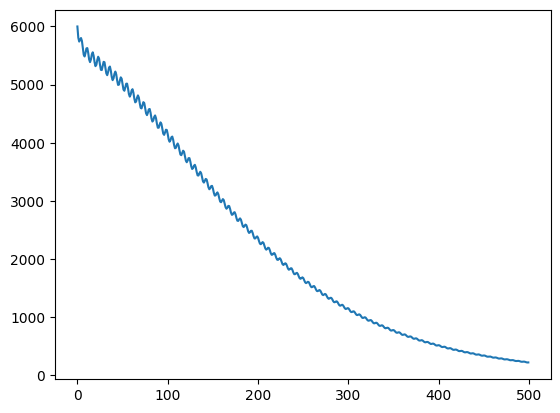

In [29]:
for i in sims3.sims:
    plt.plot(i.t,i.I)


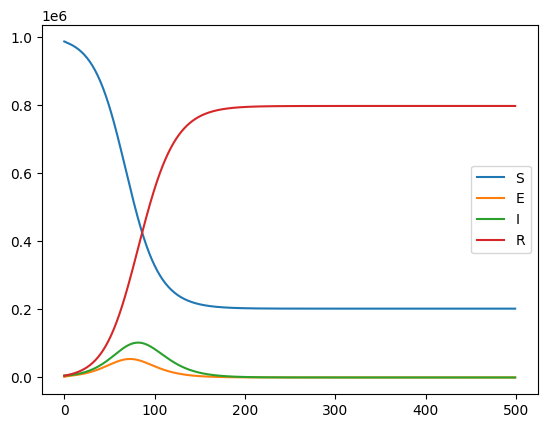

In [30]:
plt.plot(sim.t,sim.S,label='S')
plt.plot(sim.t,sim.E,label='E')
plt.plot(sim.t,sim.I,label='I')
plt.plot(sim.t,sim.R,label='R')
plt.legend(loc=0)
plt.show()

# SEIRHVD

In [31]:
cfgfile = 'cfg/SEIRHVD.toml'
cfg = toml.load(cfgfile)
sims4 = CV19MULTISIM(cfg,model='SEIRHVD')

In [32]:
sims4.solve()

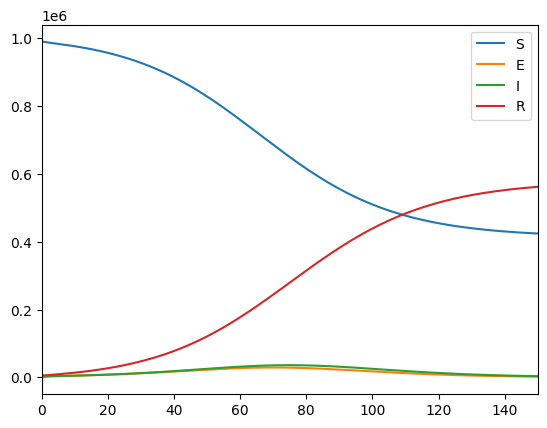

In [33]:
plt.plot(sims4.sims[0].t,sims4.sims[0].S,label='S')
plt.plot(sims4.sims[0].t,sims4.sims[0].E,label='E')
plt.plot(sims4.sims[0].t,sims4.sims[0].I,label='I')
plt.plot(sims4.sims[0].t,sims4.sims[0].R,label='R')
plt.xlim(0,150)
plt.legend(loc=0)
plt.show()

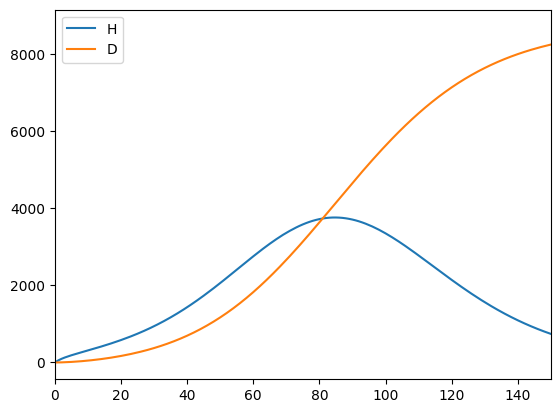

In [34]:
plt.plot(sims4.sims[0].t,sims4.sims[0].H,label='H')
plt.plot(sims4.sims[0].t,sims4.sims[0].D,label='D')
plt.xlim(0,150)
plt.legend(loc=0)
plt.show()

## Multiple simulations with array of parameters

In [35]:
cfgfile = 'cfg/SEIRHVD.toml'
cfg = toml.load(cfgfile)
sims5 = CV19MULTISIM(cfg,model='SEIRHVD',pH_D = list(np.linspace(0, 0.5, 10)),H_cap = 10000)

In [36]:
sims5.solve()

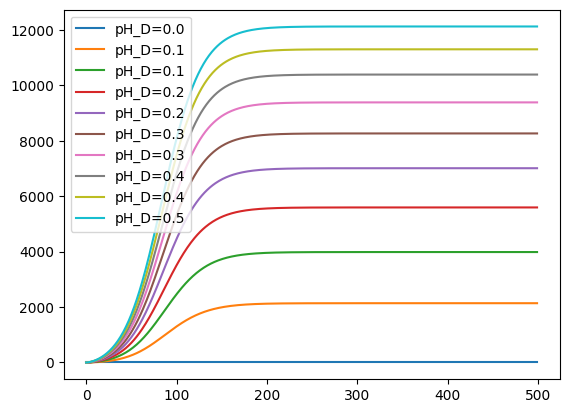

In [37]:
for sim in sims5.sims:
    plt.plot(sim.t,sim.D,label='pH_D='+str(np.around(sim.pH_D(0),1)))
plt.legend(loc=0)
plt.show()

In [38]:
cfgfile = '../config_files/SEIR.toml'

In [39]:
sims = CV19MULTISIM(cfgfile,beta=[0.18,0.2,0.22])

In [40]:
sims.solve()

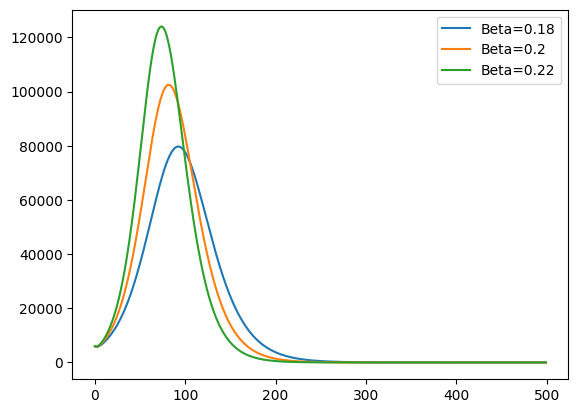

In [41]:
for i in sims.sims:
    plt.plot(i.t,i.I,label='Beta='+str(i.beta(0)))
    
plt.legend(loc=0)
plt.show()